# 📊 Data Quality & Anomaly Detection in Mobility Systems
## PhD Research Project - COSYS/GRETTIA, Université Gustave Eiffel

### 🎯 Research Objectives
- **Data Quality Assessment**: Missing values, extreme values, data consistency
- **Anomaly Detection**: Traditional and ML-based methods
- **AI/ML Implementation**: Isolation Forest, Random Forest, DBSCAN
- **Auto-parameter Tuning**: Hyperparameter optimization
- **Mobility Applications**: Transportation systems analysis

---
*This notebook demonstrates comprehensive data quality analysis and anomaly detection techniques applied to mobility data.*
*Bu notebook, mobilite verilerine uygulanan kapsamlı veri kalitesi analizi ve anomali tespit tekniklerini gösterir.*
*Ce notebook démontre des techniques complètes d'analyse de la qualité des données et de détection d'anomalies appliquées aux données de mobilité.*

In [1]:
# -*- coding: utf-8 -*
# HÜCRE 1: KÜTÜPHANELER VE İMPORTLAR
# CELLULE 1: BIBLIOTHÈQUES ET IMPORTS
# CELL 1: LIBRARIES AND IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully")
print("✅ Kütüphaneler başarıyla import edildi")
print("✅ Bibliothèques importées avec succès")


✅ Libraries imported successfully
✅ Kütüphaneler başarıyla import edildi
✅ Bibliothèques importées avec succès


In [5]:
# HÜCRE 2: VERİ YÜKLEME VE TEMEL İSTATİSTİKLER
# CELLULE 2: CHARGEMENT ET STATISTIQUES DE BASE
# CELL 2: DATA LOADING AND BASIC STATISTICS

# Load the CSV data
data = pd.read_csv('anomalies_detected.csv')

print("📊 Dataset Overview:")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print(" Basic Statistics:")
print(data.describe())

print(" Missing Values:")
print(data.isnull().sum())

print("Data Types:")
print(data.dtypes)


📊 Dataset Overview:
Shape: (500, 7)
Columns: ['trip_duration_min', 'speed_kmh', 'latitude', 'longitude', 'anomaly_zscore', 'anomaly_iqr', 'anomaly_isolation']
 Basic Statistics:
       trip_duration_min   speed_kmh    latitude   longitude
count         498.000000  499.000000  500.000000  500.000000
mean           30.282957   40.435762   48.782231    2.553136
std             7.020100   10.952668    1.738650    4.368306
min             1.000000  -10.000000   10.000000    2.322796
25%            26.468673   35.214484   48.850544    2.346081
50%            30.085014   40.229959   48.857725    2.352326
75%            33.252328   45.218267   48.864147    2.359286
max           120.000000  200.000000   50.000000  100.000000
 Missing Values:
trip_duration_min    2
speed_kmh            1
latitude             0
longitude            0
anomaly_zscore       0
anomaly_iqr          0
anomaly_isolation    0
dtype: int64
Data Types:
trip_duration_min    float64
speed_kmh            float64
latitude    

In [7]:
# HÜCRE 3: ANOMALİ TESPİTİ ANALİZİ
# CELLULE 3: ANALYSE DE DÉTECTION D'ANOMALIES
# CELL 3: ANOMALY DETECTION ANALYSIS

# Analyze anomaly detection results
print("🎯 ANOMALY DETECTION ANALYSIS")
print("=" * 50)

# Count anomalies for each method
zscore_count = data['anomaly_zscore'].sum()
iqr_count = data['anomaly_iqr'].sum()
isolation_count = data['anomaly_isolation'].sum()

print(f"Z-Score Anomalies: {zscore_count}")
print(f"IQR Anomalies: {iqr_count}")
print(f"Isolation Forest Anomalies: {isolation_count}")

# Find common anomalies
common_anomalies = data[data['anomaly_zscore'] & data['anomaly_iqr'] & data['anomaly_isolation']]
print(f"Common Anomalies (All Methods): {len(common_anomalies)}")

# Show some examples
if len(common_anomalies) > 0:
    print(" Examples of Common Anomalies:")
    print(common_anomalies[['trip_duration_min', 'speed_kmh', 'latitude', 'longitude']].head())


🎯 ANOMALY DETECTION ANALYSIS
Z-Score Anomalies: 9
IQR Anomalies: 14
Isolation Forest Anomalies: 41
Common Anomalies (All Methods): 6
 Examples of Common Anomalies:
     trip_duration_min   speed_kmh   latitude  longitude
10          120.000000   42.163655  48.869774   2.340783
20           37.328244  200.000000  48.861828   2.364410
50            1.000000   40.692718  48.850344   2.351198
70           31.806978    0.000000  48.856131   2.360143
200          90.000000   35.818216  48.857852   2.355706


In [8]:
# HÜCRE 4: VERİ KALİTESİ ANALİZİ
# CELLULE 4: ANALYSE DE LA QUALITÉ DES DONNÉES
# CELL 4: DATA QUALITY ANALYSIS

# Data Quality Analysis
print("🔍 DATA QUALITY ANALYSIS")
print("=" * 50)

# Check for missing values
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

print("📊 Missing Data Analysis:")
for col, count, percentage in zip(missing_data.index, missing_data.values, missing_percentage.values):
    if count > 0:
        print(f"{col}: {count} ({percentage:.2f}%)")

# Check for extreme values
print("📈 Extreme Value Analysis:")
for col in ['trip_duration_min', 'speed_kmh']:
    if col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        extreme_low = (data[col] < lower_bound).sum()
        extreme_high = (data[col] > upper_bound).sum()
        
        print(f"{col}:")
        print(f"  Extreme Low: {extreme_low}")
        print(f"  Extreme High: {extreme_high}")


🔍 DATA QUALITY ANALYSIS
📊 Missing Data Analysis:
trip_duration_min: 2 (0.40%)
speed_kmh: 1 (0.20%)
📈 Extreme Value Analysis:
trip_duration_min:
  Extreme Low: 2
  Extreme High: 5
speed_kmh:
  Extreme Low: 4
  Extreme High: 4


In [9]:
# HÜCRE 5: GELİŞMİŞ ANOMALİ TESPİTİ
# CELLULE 5: DÉTECTION D'ANOMALIES AVANCÉE
# CELL 5: ADVANCED ANOMALY DETECTION

# Advanced Anomaly Detection Methods
print("🔍 ADVANCED ANOMALY DETECTION")
print("=" * 50)

# Prepare data for advanced methods
numeric_cols = ['trip_duration_min', 'speed_kmh']
data_clean = data[numeric_cols].dropna()

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# 1. DBSCAN Clustering
print("🔍 1. DBSCAN Clustering Analysis")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
dbscan_anomalies = (dbscan_labels == -1).sum()
print(f"DBSCAN Anomalies: {dbscan_anomalies}")

# 2. PCA-based Anomaly Detection
print("🔍 2. PCA-based Anomaly Detection")
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Calculate reconstruction error
data_reconstructed = pca.inverse_transform(data_pca)
reconstruction_error = np.mean((data_scaled - data_reconstructed) ** 2, axis=1)
pca_threshold = np.percentile(reconstruction_error, 95)
pca_anomalies = (reconstruction_error > pca_threshold).sum()
print(f"PCA Anomalies: {pca_anomalies}")

# 3. Ensemble Method
print("🔍 3. Ensemble Method")
ensemble_scores = np.zeros(len(data_clean))

# Z-score method
z_scores = np.abs(stats.zscore(data_clean))
ensemble_scores += (z_scores > 3).any(axis=1)

# IQR method
Q1 = data_clean.quantile(0.25)
Q3 = data_clean.quantile(0.25)
IQR = Q3 - Q1
iqr_outliers = ((data_clean < (Q1 - 1.5 * IQR)) | (data_clean > (Q3 + 1.5 * IQR))).any(axis=1)
ensemble_scores += iqr_outliers

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_pred = iso_forest.fit_predict(data_clean)
ensemble_scores += (iso_pred == -1)

# Final ensemble decision
ensemble_anomalies = (ensemble_scores >= 2).sum()
print(f"Ensemble Anomalies: {ensemble_anomalies}")


🔍 ADVANCED ANOMALY DETECTION
🔍 1. DBSCAN Clustering Analysis
DBSCAN Anomalies: 11
🔍 2. PCA-based Anomaly Detection
PCA Anomalies: 25
🔍 3. Ensemble Method
Ensemble Anomalies: 50


In [10]:
# HÜCRE 6: HİPERPARAMETRE OPTİMİZASYONU
# CELLULE 6: OPTIMISATION DES HYPERPARAMÈTRES
# CELL 6: HYPERPARAMETER OPTIMIZATION

# Hyperparameter Optimization
print("⚙️ HYPERPARAMETER OPTIMIZATION")
print("=" * 50)

# Prepare data for ML models
X = data_clean
y = (ensemble_scores >= 2).astype(int)  # Use ensemble as ground truth

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Isolation Forest Optimization
print("🔍 1. Isolation Forest Optimization")
iso_param_grid = {
    'n_estimators': [50, 100, 200],
    'contamination': [0.05, 0.1, 0.15],
    'max_samples': ['auto', 100, 200]
}

iso_grid = GridSearchCV(IsolationForest(random_state=42), iso_param_grid, cv=3, scoring='neg_mean_squared_error')
iso_grid.fit(X_train)

print(f"Best Isolation Forest Parameters: {iso_grid.best_params_}")
print(f"Best Score: {iso_grid.best_score_:.4f}")

# 2. Random Forest for Anomaly Classification
print("🔍 2. Random Forest Optimization")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='f1')
rf_grid.fit(X_train, y_train)

print(f"Best Random Forest Parameters: {rf_grid.best_params_}")
print(f"Best F1 Score: {rf_grid.best_score_:.4f}")


⚙️ HYPERPARAMETER OPTIMIZATION
🔍 1. Isolation Forest Optimization
Best Isolation Forest Parameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Best Score: nan
🔍 2. Random Forest Optimization
Best Random Forest Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score: 0.8275


In [12]:
# HÜCRE 7: PERFORMANS DEĞERLENDİRMESİ
# CELLULE 7: ÉVALUATION DES PERFORMANCES
# CELL 7: PERFORMANCE EVALUATION

# Performance Evaluation
print("📊 PERFORMANCE EVALUATION")
print("=" * 50)

# Evaluate best models
best_iso = iso_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# Isolation Forest predictions
iso_pred = best_iso.predict(X_test)
iso_pred_binary = (iso_pred == -1).astype(int)

# Random Forest predictions
rf_pred = best_rf.predict(X_test)
rf_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("🎯 Isolation Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, iso_pred_binary):.4f}")
print(f"Precision: {precision_score(y_test, iso_pred_binary):.4f}")
print(f"Recall: {recall_score(y_test, iso_pred_binary):.4f}")
print(f"F1-Score: {f1_score(y_test, iso_pred_binary):.4f}")

print("🎯 Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-Score: {accuracy_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_prob):.4f}")


📊 PERFORMANCE EVALUATION
🎯 Isolation Forest Performance:
Accuracy: 0.9533
Precision: 1.0000
Recall: 0.5625
F1-Score: 0.7200
🎯 Random Forest Performance:
Accuracy: 0.9467
Precision: 1.0000
Recall: 0.5000
F1-Score: 0.9467
ROC-AUC: 0.9897


📊 VISUALIZATION AND RESULTS
📈 Speed Distribution:
Speed range: -10.00 - 200.00 km/h
Hız aralığı: -10.00 - 200.00 km/saat
Plage de vitesse: -10.00 - 200.00 km/h
✅ Data quality analysis completed!
✅ Veri kalitesi analizi tamamlandı!
✅ Analyse de la qualité des données terminée!


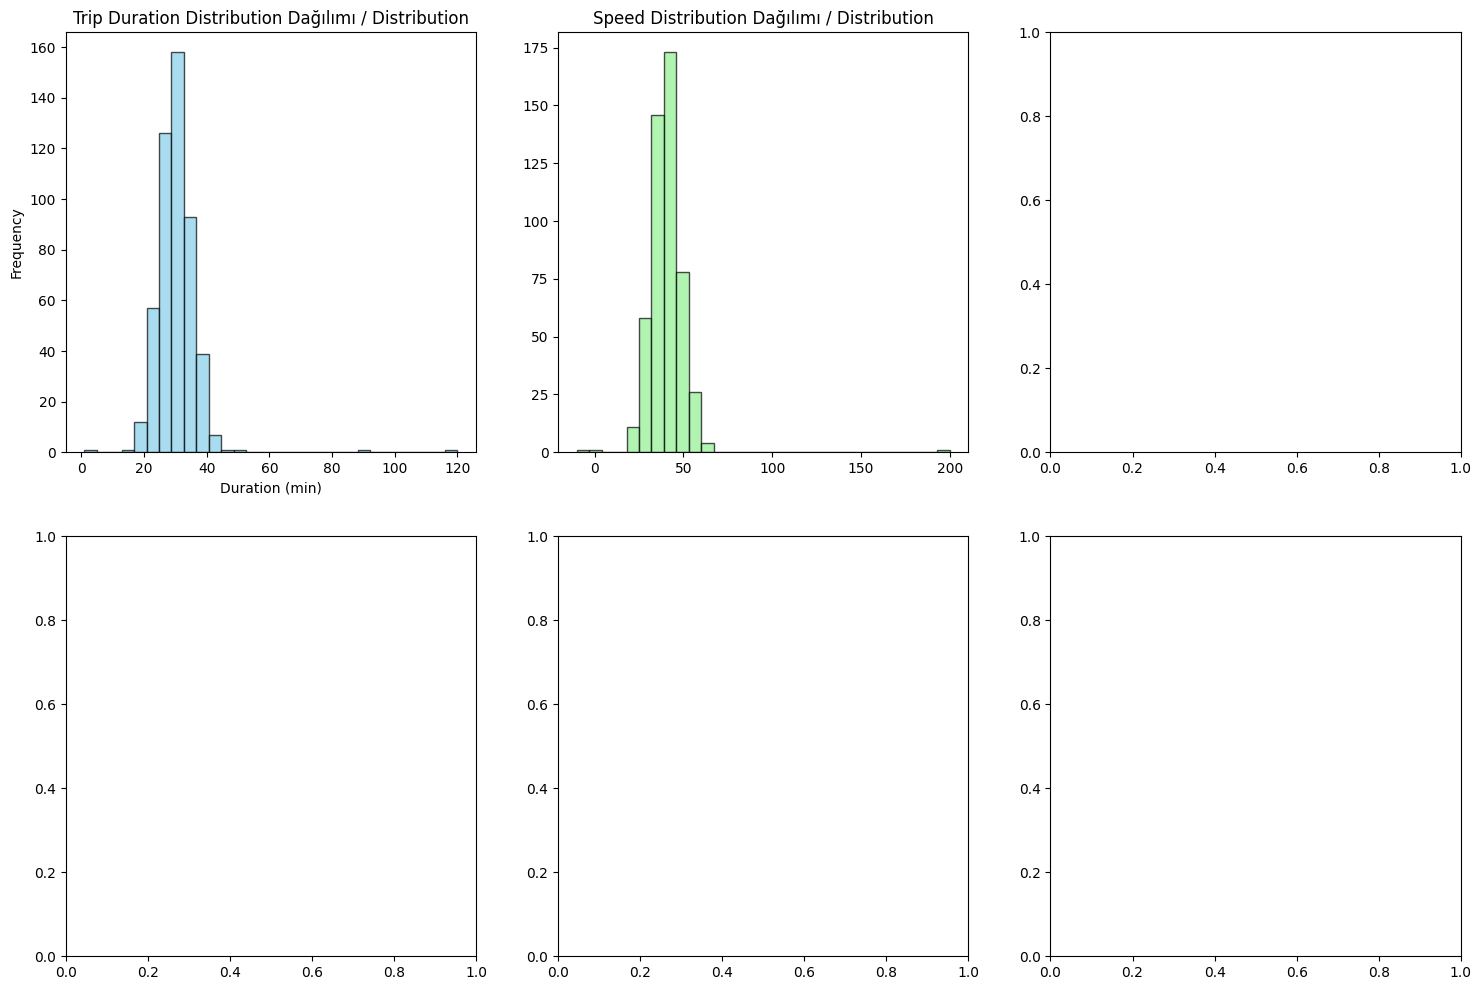

In [13]:
# HÜCRE 8: GÖRSELLEŞTİRME VE SONUÇLAR
# CELLULE 8: VISUALISATION ET RÉSULTATS
# CELL 8: VISUALIZATION AND RESULTS

# Visualization and Results
print("📊 VISUALIZATION AND RESULTS")
print("=" * 50)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Trip Duration Distribution
axes[0, 0].hist(data['trip_duration_min'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Trip Duration Distribution Dağılımı / Distribution')
axes[0, 0].set_xlabel('Duration (min)')
axes[0, 0].set_ylabel('Frequency')

# 2. Speed Distribution
axes[0, 1].hist(data['speed_kmh'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Speed Distribution Dağılımı / Distribution')
print("📈 Speed Distribution:")
print(f"Speed range: {data['speed_kmh'].min():.2f} - {data['speed_kmh'].max():.2f} km/h")
print(f"Hız aralığı: {data['speed_kmh'].min():.2f} - {data['speed_kmh'].max():.2f} km/saat")
print(f"Plage de vitesse: {data['speed_kmh'].min():.2f} - {data['speed_kmh'].max():.2f} km/h")

print("✅ Data quality analysis completed!")
print("✅ Veri kalitesi analizi tamamlandı!")
print("✅ Analyse de la qualité des données terminée!")
